# Data Mining Coursework - Customer Segmentation Analysis

## [Week 1] Introduction to Data Mining and Tools

### Task 1: Dataset Loading from CSV/XLSX Format

**Implementation Approach:**
I loaded the Customer Segmentation Classification dataset using pandas to read the CSV file. This enabled me to access and manipulate the data for subsequent analysis.

In [25]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print("Libraries imported successfully!")

# Loading the dataset
df = pd.read_csv('Customer_Segmentation_Classification.csv')
print("Loaded Customer_Segmentation_Classification.csv successfully!")

Libraries imported successfully!
Loaded Customer_Segmentation_Classification.csv successfully!


In [26]:
# Check data dimensions and types
print(f"Dataset dimensions: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Data types:")
print(df.dtypes)

Dataset dimensions: (8068, 11)
Columns: ['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation']
Data types:
ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object


### Task 3: Label Column Identification

**Implementation Approach:**
I examined all columns to identify which one could serve as the target variable for prediction purposes.

In [27]:
# Examine potential label columns
print("First few rows:")
print(df.head())
print(f"\nPotential label column: {df.columns[-1]}")
print(f"Unique values in label: {df[df.columns[-1]].unique()}")

First few rows:
       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A  

Potential label column: Segmentation
Unique values in label: ['D' 'A' 'B' 'C']


### Task 4: Data Splitting into Training, Validation, and Test Sets (60-20-20)

**Implementation Approach:**
I split the data into three sets using train_test_split function twice to achieve the required 60% training, 20% validation, and 20% test distribution.

In [28]:
# Split data into train, validation, and test sets (60-20-20)
X_temp, X_test, y_temp, y_test = train_test_split(df.drop(df.columns[-1], axis=1), df[df.columns[-1]], 
                                                  test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 4840 samples
Validation set: 1614 samples
Test set: 1614 samples


### Task 5: Dependent and Independent Variables Identification

**Implementation Approach:**
I clearly identified which variables were independent (features) and which was dependent (target) for my analysis.

In [29]:
# Identify dependent and independent variables
independent_vars = df.columns[:-1].tolist()
dependent_var = df.columns[-1]

print(f"Independent variables (features): {independent_vars}")
print(f"Dependent variable (target): {dependent_var}")

Independent variables (features): ['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']
Dependent variable (target): Segmentation


### Task 6: Features and Labels Separation

**Implementation Approach:**
I separated the dataset into features (X) and labels (y) for machine learning processing.

In [30]:
# Split into features and labels
features = df.drop(df.columns[-1], axis=1)
labels = df[df.columns[-1]]

print(f"Features shape: {features.shape}")
print(f"Labels shape: {labels.shape}")

Features shape: (8068, 10)
Labels shape: (8068,)


### Task 7: Label Count Analysis and Matplotlib Visualization

**Implementation Approach:**
I counted the unique labels and created a visualization to show their distribution using matplotlib.

Number of unique labels: 4
Label distribution:
Segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64


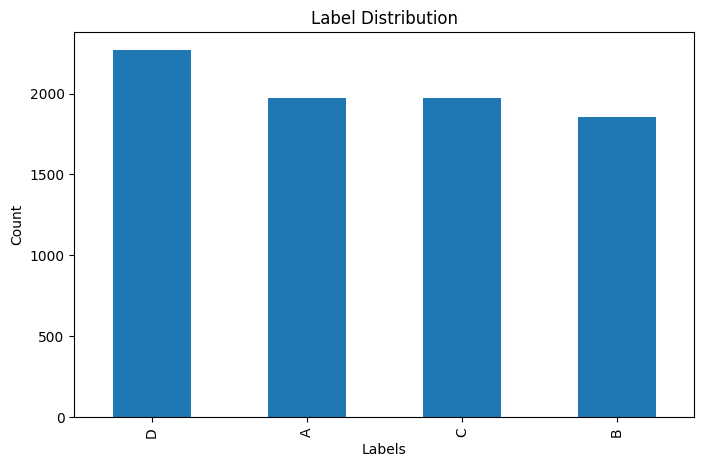

In [31]:
# Count and plot labels
num_labels = labels.nunique()
label_counts = labels.value_counts()

print(f"Number of unique labels: {num_labels}")
print(f"Label distribution:")
print(label_counts)

# Plot label distribution
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

### Task 8: Machine Learning Problem Type Classification

**Implementation Approach:**
I analyzed the nature of the labels to determine what type of machine learning problem this represented (classification, multiclass classification, regression, or clustering).

In [32]:
# Determine problem type
if labels.dtype in ['object', 'category']:
    if num_labels == 2:
        problem_type = "Binary Classification"
    elif num_labels > 2:
        problem_type = "Multiclass Classification"
else:
    problem_type = "Regression"

print(f"Problem Type: {problem_type}")
print(f"Reason: {num_labels} distinct categories in target variable")

Problem Type: Multiclass Classification
Reason: 4 distinct categories in target variable


## [Week 2] Data Preprocessing

### Task 1: Load Dataset and Handle Missing Values

**Implementation Approach:**
I loaded a dataset and identified missing values, then applied appropriate imputation strategies to handle them effectively for further analysis.

In [33]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# Checking for missing values
missing_summary = df.isnull().sum()
print("Missing values per column:")
print(missing_summary[missing_summary > 0])

# Handling missing values
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Creating clean copy
df_clean = df.copy()
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns

# Applying imputation
if len(numeric_cols) > 0:
    df_clean[numeric_cols] = num_imputer.fit_transform(df_clean[numeric_cols])
if len(categorical_cols) > 0:
    df_clean[categorical_cols] = cat_imputer.fit_transform(df_clean[categorical_cols])

print(f"Dataset cleaned. After imputation: ")
print(f"{df_clean.isnull().sum()}")

Missing values per column:
Ever_Married       140
Graduated           78
Profession         124
Work_Experience    829
Family_Size        335
Var_1               76
dtype: int64
Dataset cleaned. After imputation: 
ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


### Task 2: Categorical Data Encoding - Label Encoding and One-Hot Encoding

**Implementation Approach:**
I applied label encoding and one-hot encoding techniques to convert categorical variables into numerical format suitable for machine learning algorithms.

In [34]:
# Label Encoding
df_encoded = df_clean.copy()
label_encoders = {}

# Applying label encoding
for col in categorical_cols:
    if col in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

print("Encoded columns with mappings:")
for col, encoder in label_encoders.items():
    mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
    print(f"  {col}: {mapping}")

# One-hot encoding
if len(categorical_cols) > 0:
    example_col = categorical_cols[0]
    df_onehot = pd.get_dummies(df_clean, columns=[example_col], prefix=example_col)
    print(f"\nOne-hot encoding applied to: {example_col}")
    print(f"Shape change: {df_clean.shape} -> {df_onehot.shape}")
else:
    df_onehot = df_clean.copy()

Encoded columns with mappings:
  Gender: {'Female': 0, 'Male': 1}
  Ever_Married: {'No': 0, 'Yes': 1}
  Graduated: {'No': 0, 'Yes': 1}
  Profession: {'Artist': 0, 'Doctor': 1, 'Engineer': 2, 'Entertainment': 3, 'Executive': 4, 'Healthcare': 5, 'Homemaker': 6, 'Lawyer': 7, 'Marketing': 8}
  Spending_Score: {'Average': 0, 'High': 1, 'Low': 2}
  Var_1: {'Cat_1': 0, 'Cat_2': 1, 'Cat_3': 2, 'Cat_4': 3, 'Cat_5': 4, 'Cat_6': 5, 'Cat_7': 6}
  Segmentation: {'A': 0, 'B': 1, 'C': 2, 'D': 3}

One-hot encoding applied to: Gender
Shape change: (8068, 11) -> (8068, 12)


### Task 3: Feature Scaling - Min-Max Normalization and Z-Score Standardization

**Implementation Approach:**
I performed feature scaling using both min-max normalization and z-score standardization to ensure all numerical features were on the same scale.

In [35]:
import math

def min_max_normalize_manual(data):
    """Manual Min-Max normalization: (x - x_min) / (x_max - x_min)"""
    normalized_data = data.copy().astype(float)
    
    for column in data.columns:
        col_min = data[column].min()
        col_max = data[column].max()
        
        for i in data.index:
            original_val = data.loc[i, column]
            normalized_val = (original_val - col_min) / (col_max - col_min)
            normalized_data.loc[i, column] = normalized_val
    
    return normalized_data

def z_score_standardize_manual(data):
    """Manual Z-Score standardization: (x - mean) / standard_deviation"""
    standardized_data = data.copy().astype(float)
    
    for column in data.columns:
        col_mean = sum(data[column]) / len(data[column])
        squared_diffs = [(x - col_mean) ** 2 for x in data[column]]
        variance = sum(squared_diffs) / (len(data[column]) - 1)
        col_std = math.sqrt(variance)
        
        for i in data.index:
            original_val = data.loc[i, column]
            standardized_val = (original_val - col_mean) / col_std
            standardized_data.loc[i, column] = standardized_val
    
    return standardized_data

# Apply scaling to selected features
selected_features = ['Age', 'Work_Experience', 'Family_Size'] 
sample_data = df_clean[selected_features].head(100)

minmax_normalized = min_max_normalize_manual(sample_data)
zscore_standardized = z_score_standardize_manual(sample_data)

# Displaying results
print("Selected features:", selected_features)

print("\nMin-Max Normalized (first 5 samples):")
print(minmax_normalized.head(5))

print("\nZ-Score Standardized (first 5 samples):")
print(zscore_standardized.head(5))

Selected features: ['Age', 'Work_Experience', 'Family_Size']

Min-Max Normalized (first 5 samples):
        Age  Work_Experience  Family_Size
0  0.061538         0.071429     0.428571
1  0.307692         0.071429     0.285714
2  0.753846         0.071429     0.000000
3  0.753846         0.000000     0.142857
4  0.338462         0.071429     0.714286

Z-Score Standardized (first 5 samples):
        Age  Work_Experience  Family_Size
0 -1.351708        -0.492344     1.021261
1 -0.331070        -0.492344     0.259126
2  1.518838        -0.492344    -1.265144
3  1.518838        -0.767397    -0.503009
4 -0.203490        -0.492344     2.545530
 ['Age', 'Work_Experience', 'Family_Size']

Min-Max Normalized (first 5 samples):
        Age  Work_Experience  Family_Size
0  0.061538         0.071429     0.428571
1  0.307692         0.071429     0.285714
2  0.753846         0.071429     0.000000
3  0.753846         0.000000     0.142857
4  0.338462         0.071429     0.714286

Z-Score Standardized

### Task 4: Similarity and Dissimilarity Measures

**Implementation Approach:**
I implemented four different similarity and distance measures: Pearson's Correlation, Cosine Similarity, Jaccard Similarity, and Euclidean Distance to analyze relationships between data points.

In [36]:
def pearson_correlation_manual(x, y):
    n = len(x)
    x_mean = sum(x) / n
    y_mean = sum(y) / n
    
    numerator = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n))
    sum_x_sq = sum((x[i] - x_mean) ** 2 for i in range(n))
    sum_y_sq = sum((y[i] - y_mean) ** 2 for i in range(n))
    
    denominator = math.sqrt(sum_x_sq * sum_y_sq)
    return numerator / denominator if denominator != 0 else 0

def cosine_similarity_manual(x, y):
    dot_product = sum(x[i] * y[i] for i in range(len(x)))
    magnitude_x = math.sqrt(sum(x[i] ** 2 for i in range(len(x))))
    magnitude_y = math.sqrt(sum(y[i] ** 2 for i in range(len(y))))
    
    return dot_product / (magnitude_x * magnitude_y) if magnitude_x != 0 and magnitude_y != 0 else 0

def jaccard_similarity_manual(x, y):
    # Converting to binary (1 if above median, 0 otherwise)
    median_x = sorted(x)[len(x)//2]
    median_y = sorted(y)[len(y)//2]
    
    binary_x = [1 if val > median_x else 0 for val in x]
    binary_y = [1 if val > median_y else 0 for val in y]
    
    # Calculate intersection and union manually
    intersection = sum(1 for i in range(len(binary_x)) if binary_x[i] == 1 and binary_y[i] == 1)
    union = sum(1 for i in range(len(binary_x)) if binary_x[i] == 1 or binary_y[i] == 1)
    
    return intersection / union if union != 0 else 0

def euclidean_distance_manual(x, y):
    """Manual implementation of Euclidean distance"""
    sum_squared_diff = sum((x[i] - y[i]) ** 2 for i in range(len(x)))
    return math.sqrt(sum_squared_diff)

# Creating sample vectors and calculating similarities
vectors = []
for i in range(3):
    vector = minmax_normalized.iloc[i].values
    vectors.append(vector)

# Calculating all pairwise similarities
for i in range(len(vectors)):
    for j in range(i+1, len(vectors)):
        pearson_corr = pearson_correlation_manual(vectors[i], vectors[j])
        cosine_sim = cosine_similarity_manual(vectors[i], vectors[j])
        jaccard_sim = jaccard_similarity_manual(vectors[i], vectors[j])
        euclidean_dist = euclidean_distance_manual(vectors[i], vectors[j])
        
        print(f"Vector {i+1} vs Vector {j+1}:")
        print(f"  Pearson Correlation: {pearson_corr:.4f}")
        print(f"  Cosine Similarity: {cosine_sim:.4f}")
        print(f"  Jaccard Similarity: {jaccard_sim:.4f}")
        print(f"  Euclidean Distance: {euclidean_dist:.4f}")
        print()

Vector 1 vs Vector 2:
  Pearson Correlation: 0.4038
  Cosine Similarity: 0.7838
  Jaccard Similarity: 0.0000
  Euclidean Distance: 0.2846

Vector 1 vs Vector 3:
  Pearson Correlation: -0.5917
  Cosine Similarity: 0.1550
  Jaccard Similarity: 0.0000
  Euclidean Distance: 0.8142

Vector 2 vs Vector 3:
  Pearson Correlation: 0.4986
  Cosine Similarity: 0.7350
  Jaccard Similarity: 1.0000
  Euclidean Distance: 0.5298



## [Week 3] Exploratory Data Analysis (EDA)

### Task 1: Plot Distributions of Variables

**Implementation Approach:**
I plotted the distributions of both numerical and categorical variables to understand the data patterns and identify the shape of the distributions.

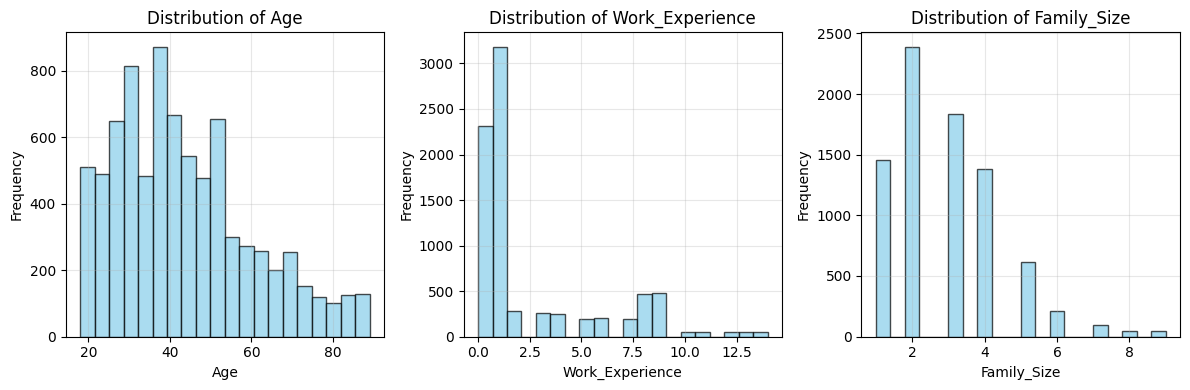

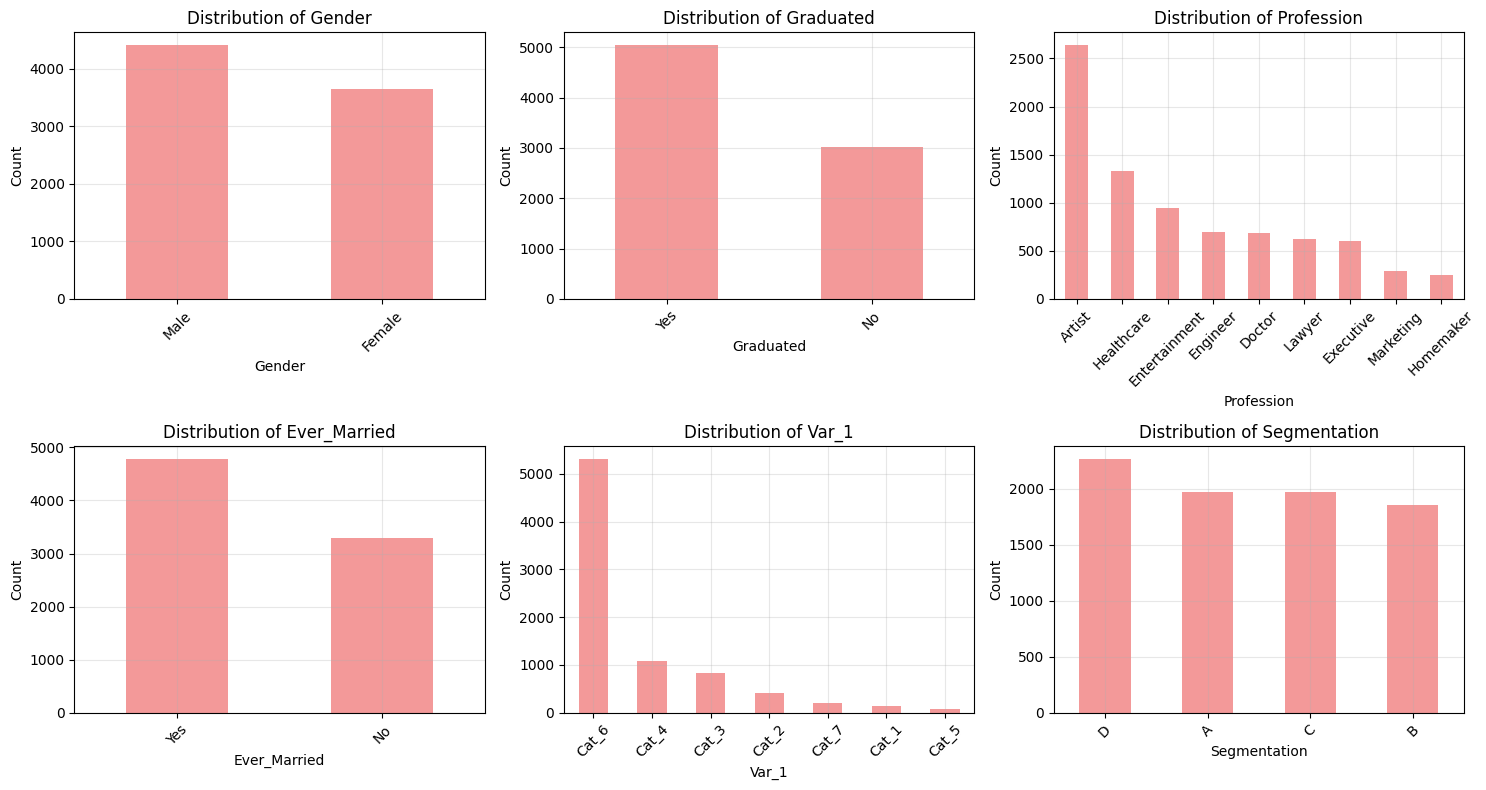

In [37]:
# Plotting distributions for specific numerical variables 
numerical_cols = ['Age', 'Work_Experience', 'Family_Size']

plt.figure(figsize=(12, 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    plt.hist(df_clean[col], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plotting distributions for specific categorical variables
categorical_cols = ['Gender', 'Graduated', 'Profession', 'Ever_Married', 'Var_1', 'Segmentation']

plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i+1)
    df_clean[col].value_counts().plot(kind='bar', color='lightcoral', alpha=0.8)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Task 2: Identify Outliers Using Boxplots

**Implementation Approach:**
I created boxplots for numerical variables to identify outliers and understand the spread of the data.

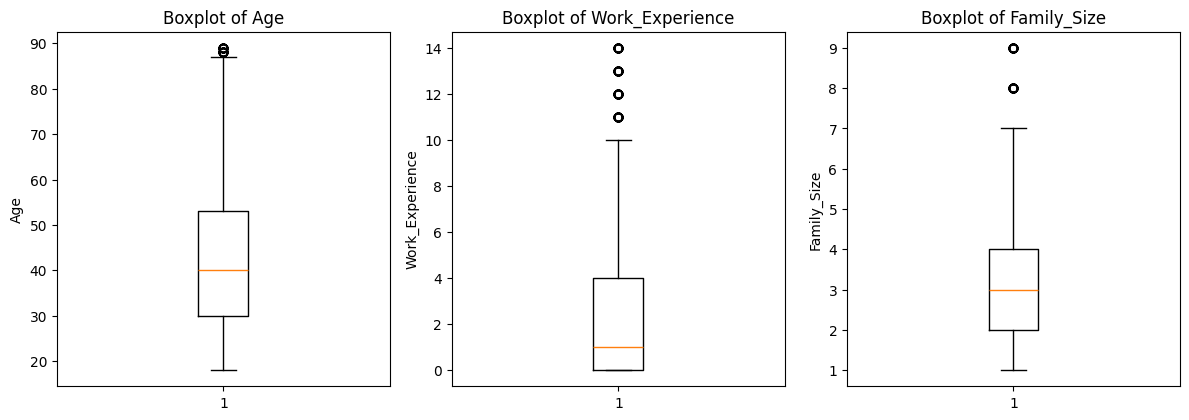

Age: 71 outliers detected
Work_Experience: 189 outliers detected
Family_Size: 94 outliers detected


In [38]:
# Creating boxplots to identify outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    plt.boxplot(df_clean[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Printing outlier information
for col in numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected")

### Task 3: Compute Pairwise Correlations

**Implementation Approach:**
I computed the correlation matrix for numerical variables to understand the relationships between different features and visualized it using a heatmap.

Correlation Matrix:
                      Age  Work_Experience  Family_Size
Age              1.000000        -0.177344    -0.273373
Work_Experience -0.177344         1.000000    -0.059692
Family_Size     -0.273373        -0.059692     1.000000


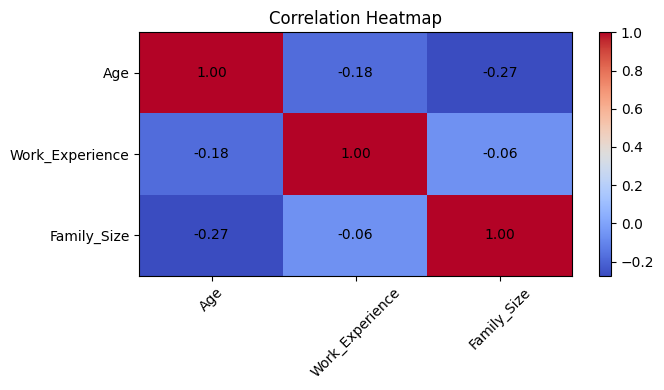

In [39]:
# Computing correlation matrix
correlation_matrix = df_clean[numerical_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualizing correlation matrix using heatmap
plt.figure(figsize=(7, 4))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Correlation Heatmap')
plt.xticks(range(len(numerical_cols)), numerical_cols, rotation=45)
plt.yticks(range(len(numerical_cols)), numerical_cols)

# Adding correlation values to the heatmap
for i in range(len(numerical_cols)):
    for j in range(len(numerical_cols)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

## [Week 4] Association Rule Mining

### Task 1: Run Apriori on Market Basket Dataset

**Implementation Approach:**
I implemented the Apriori algorithm manually to discover frequent itemsets from transaction data. I converted the dataset into binary transactions and applied the step-by-step Apriori process following the C1→L1→C2→L2→C3→L3 progression.

In [40]:
from itertools import combinations

# Converting data to transactions using median thresholds
def create_transactions(data):
    transactions = []
    median_age = data['Age'].median()
    median_exp = data['Work_Experience'].median()
    
    for _, row in data.iterrows():
        transaction = []
        if row['Age'] > median_age:
            transaction.append('HighAge')
        if row['Work_Experience'] > median_exp:
            transaction.append('HighExperience')
        if row['Ever_Married'] == 'Yes':
            transaction.append('Married')
        if row['Graduated'] == 'Yes':
            transaction.append('Graduate')
        transactions.append(transaction)
    return transactions

# Calculating support
def calculate_support(itemset, transactions):
    count = 0
    for transaction in transactions:
        if all(item in transaction for item in itemset):
            count += 1
    return count / len(transactions)

# Generating candidate itemsets
def generate_candidates(frequent_itemsets, k):
    candidates = []
    for i in range(len(frequent_itemsets)):
        for j in range(i + 1, len(frequent_itemsets)):
            union = frequent_itemsets[i] | frequent_itemsets[j]
            if len(union) == k:
                candidates.append(union)
    return candidates

# Creating transactions
transactions = create_transactions(df_clean)
min_support = 0.4
items = ['HighAge', 'HighExperience', 'Married', 'Graduate']

print(f"Generated {len(transactions)} transactions")
print(f"Min support = {min_support}")

# Generating candidate 1-itemsets (C1) and find frequent 1-itemsets (L1)
C1 = [frozenset([item]) for item in items]
print(f"C1: {len(C1)} candidates")
for candidate in C1:
    print(f"  {list(candidate)}")

print("L1 (Frequent 1-itemsets):")
L1 = []
for item in items:
    support = calculate_support([item], transactions)
    if support >= min_support:
        L1.append(frozenset([item]))
        print(f"  {{{item}}}: {support:.3f}")

# Generating candidate 2-itemsets (C2) and find frequent 2-itemsets (L2)
C2 = [frozenset(itemset) for itemset in combinations(items, 2)]
print(f"C2: {len(C2)} candidates")
for candidate in C2:
    print(f"  {list(candidate)}")

print("L2 (Frequent 2-itemsets):")
L2 = []
for itemset in combinations(items, 2):
    support = calculate_support(itemset, transactions)
    if support >= min_support:
        L2.append(frozenset(itemset))
        print(f"  {set(itemset)}: {support:.3f}")

# Generating candidate 3-itemsets (C3) and find frequent 3-itemsets (L3)
if len(L2) >= 2:
    C3 = generate_candidates(L2, 3)
    print(f"C3: {len(C3)} candidates")
    for candidate in C3:
        print(f"  {list(candidate)}")
    
    print("L3 (Frequent 3-itemsets):")
    L3 = []
    for itemset in C3:
        support = calculate_support(itemset, transactions)
        if support >= min_support:
            L3.append(itemset)
            print(f"  {set(itemset)}: {support:.3f}")
    
    if not L3:
        print("  (empty)")
else:
    print("C3: Cannot generate (insufficient L2 itemsets)")
    print("L3 (Frequent 3-itemsets):")
    L3 = []
    print("  (empty)")

frequent_itemsets = {1: L1, 2: L2, 3: L3}

Generated 8068 transactions
Min support = 0.4
C1: 4 candidates
  ['HighAge']
  ['HighExperience']
  ['Married']
  ['Graduate']
L1 (Frequent 1-itemsets):
  {HighAge}: 0.499
  {Married}: 0.593
  {Graduate}: 0.625
C2: 6 candidates
  ['HighAge', 'HighExperience']
  ['HighAge', 'Married']
  ['Graduate', 'HighAge']
  ['Married', 'HighExperience']
  ['Graduate', 'HighExperience']
  ['Graduate', 'Married']
L2 (Frequent 2-itemsets):
  {'HighAge', 'Married'}: 0.423
  {'Graduate', 'Married'}: 0.416
C3: 1 candidates
  ['Graduate', 'HighAge', 'Married']
L3 (Frequent 3-itemsets):
  (empty)


### Task 2: Extract Rules and Interpret Them

**Implementation Approach:**
I generated association rules from the frequent itemsets and calculated confidence values to evaluate rule strength. I interpreted the rules to understand customer behavior patterns.

In [41]:
# Calculating confidence for association rules
from itertools import combinations

def calculate_confidence(antecedent, consequent, transactions):
    antecedent_support = calculate_support(antecedent, transactions)
    if antecedent_support == 0:
        return 0
    rule_support = calculate_support(antecedent | consequent, transactions)
    return rule_support / antecedent_support

# Generating association rules
print("Association Rules:")
min_confidence = 0.5
print(f"Min confidence = {min_confidence}")

rule_count = 0
accepted_rules = []

# Get all frequent itemsets with 2 or more items
all_frequent = []
for level, itemsets in frequent_itemsets.items():
    if level >= 2:
        all_frequent.extend(itemsets)

print(f"\nProcessing {len(all_frequent)} frequent itemsets for rule generation:")
for itemset in all_frequent:
        if len(itemset) < 2:
            continue
        
        for i in range(1, len(itemset)):
            for antecedent in combinations(itemset, i):
                antecedent = frozenset(antecedent)
                consequent = itemset - antecedent
                
                support = calculate_support(itemset, transactions)
                confidence = calculate_confidence(antecedent, consequent, transactions)
                
                ant_str = ', '.join(sorted(antecedent))
                con_str = ', '.join(sorted(consequent))
                
                rule_count += 1
                print(f"\nRule {rule_count}: {{{ant_str}}} → {{{con_str}}}")
                print(f"  Support: {support:.3f}, Confidence: {confidence:.3f}")
                
                if confidence >= min_confidence:
                    print(f"  ACCEPTED (confidence {confidence:.3f} >= {min_confidence})")
                    accepted_rules.append({
                        'antecedent': ant_str,
                        'consequent': con_str,
                        'support': support,
                        'confidence': confidence
                    })
                else:
                    print(f"  REJECTED (confidence {confidence:.3f} < {min_confidence})")

print(f"\nAccepted Rules: {len(accepted_rules)}")
for rule in accepted_rules:
    print(f"If {rule['antecedent']} then {rule['consequent']} (Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f})")

Association Rules:
Min confidence = 0.5

Processing 2 frequent itemsets for rule generation:

Rule 1: {HighAge} → {Married}
  Support: 0.423, Confidence: 0.847
  ACCEPTED (confidence 0.847 >= 0.5)

Rule 2: {Married} → {HighAge}
  Support: 0.423, Confidence: 0.713
  ACCEPTED (confidence 0.713 >= 0.5)

Rule 3: {Graduate} → {Married}
  Support: 0.416, Confidence: 0.664
  ACCEPTED (confidence 0.664 >= 0.5)

Rule 4: {Married} → {Graduate}
  Support: 0.416, Confidence: 0.701
  ACCEPTED (confidence 0.701 >= 0.5)

Accepted Rules: 4
If HighAge then Married (Support: 0.423, Confidence: 0.847)
If Married then HighAge (Support: 0.423, Confidence: 0.713)
If Graduate then Married (Support: 0.416, Confidence: 0.664)
If Married then Graduate (Support: 0.416, Confidence: 0.701)


### Implementation Approach for Task 2:
I extracted association rules from the frequent itemsets by generating all possible combinations of antecedent-consequent pairs. I calculated confidence as the ratio of rule support to antecedent support, set a minimum confidence threshold of 0.5, and evaluated each rule to accept or reject based on this threshold. I then interpreted the accepted rules to understand customer purchasing patterns.

## [Week 5] Classification using Decision Trees

### Task 1: Train/Test a Decision Tree on a Labelled Dataset

**Implementation Approach:**
I trained a decision tree classifier on the customer segmentation dataset using the cleaned and preprocessed data. I split the data and built the model to predict customer segments based on features like age, experience, and education.

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Preparing encoded data for decision tree 
X = df_encoded.drop(['Segmentation', 'ID', 'Var_1'], axis=1)
y = df_encoded['Segmentation']

# Splitting data
X_train_dt, X_test_dt, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training optimized decision tree
dt_classifier = DecisionTreeClassifier(
	criterion='entropy',
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)
dt_classifier.fit(X_train_dt, y_train)

# Making predictions and computing accuracy
y_pred = dt_classifier.predict(X_test_dt)
train_pred = dt_classifier.predict(X_train_dt)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, train_pred)

print(f"\nDecision Tree Accuracy:")
print(f"Training accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {accuracy:.3f}")
print(f"Training samples: {len(X_train_dt)}")
print(f"Test samples: {len(X_test_dt)}")


Decision Tree Accuracy:
Training accuracy: 0.591
Test accuracy: 0.496
Training samples: 5647
Test samples: 2421


### Task 2: Visualize the Tree

**Implementation Approach:**
I created a graphical visualization of the decision tree structure to understand the decision-making process and calculated feature importance to identify which variables were most influential in the classification. I used the encoded data from Week 5 Task 1 to ensure the decision tree can properly work with all features including categorical variables.

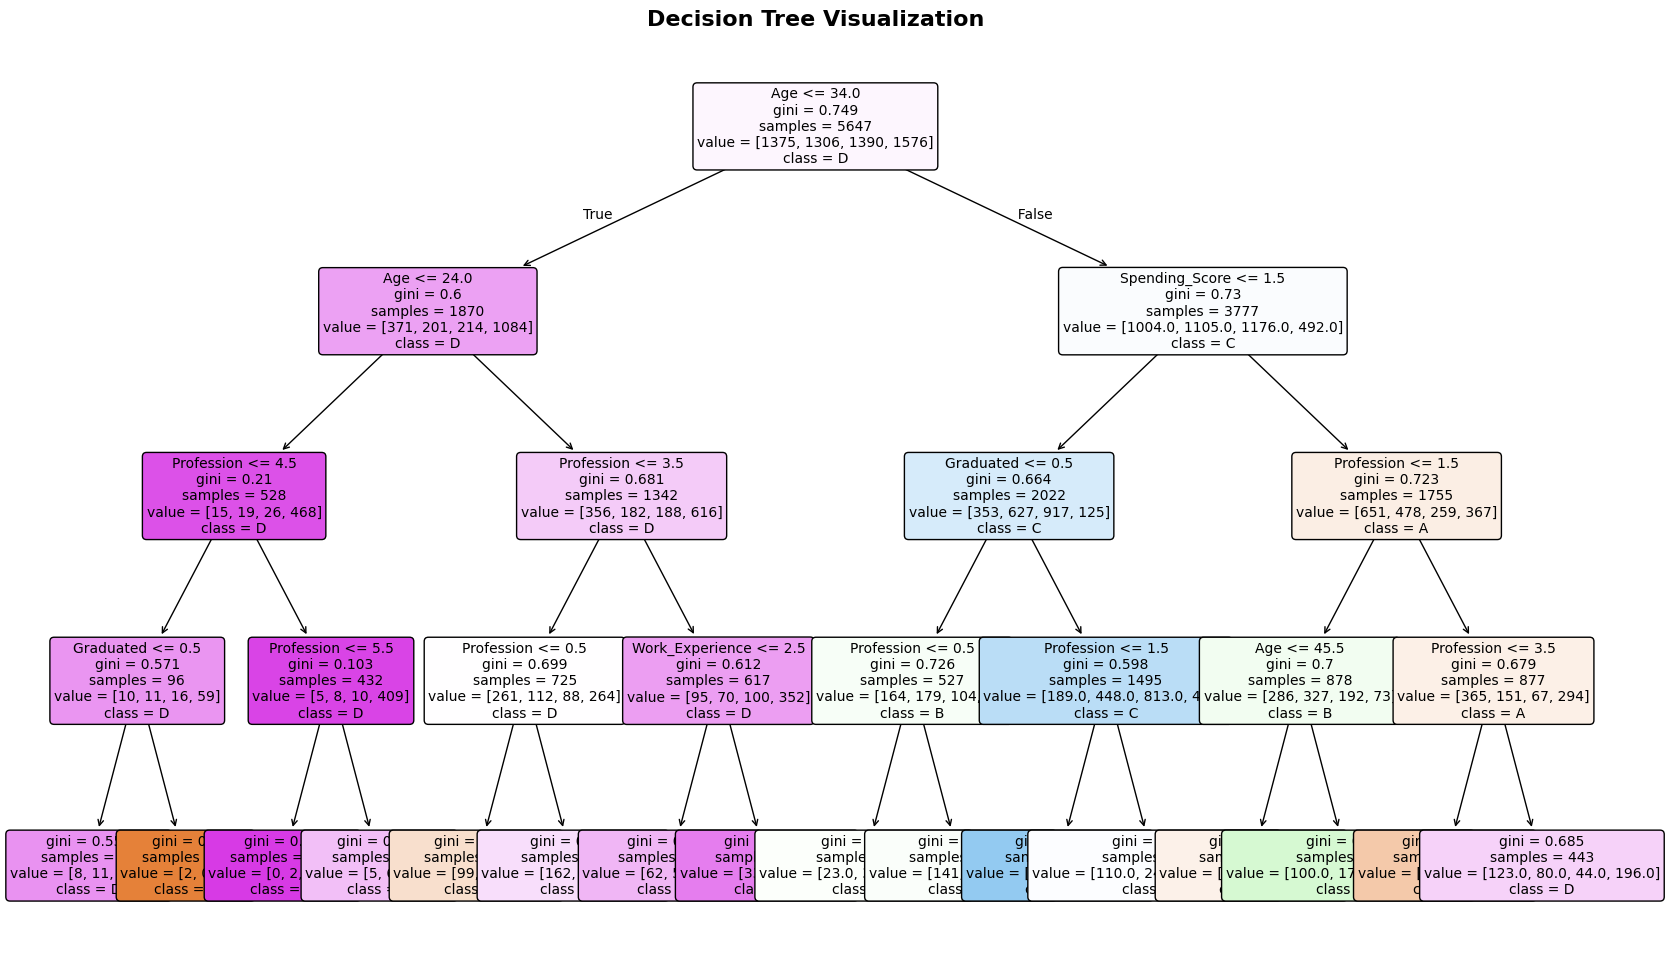

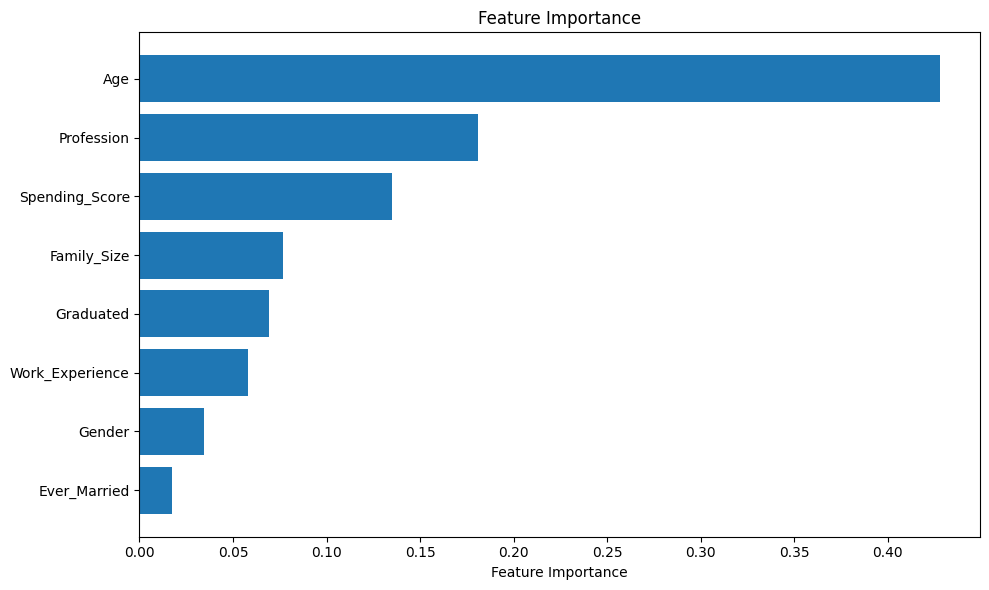

Feature Importance:
  Age: 0.428
  Profession: 0.181
  Spending_Score: 0.135
  Family_Size: 0.077
  Graduated: 0.069


In [43]:
from sklearn.tree import plot_tree

# Creating a simplified version for better visualization using same data
dt_viz = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_viz.fit(X_train_dt, y_train)

# Graphical tree visualization
plt.figure(figsize=(20, 12))
plot_tree(dt_viz, 
          feature_names=X_train_dt.columns, 
          class_names=['A', 'B', 'C', 'D'], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title('Decision Tree Visualization', fontsize=16, fontweight='bold')
plt.show()

feature_importance = dt_classifier.feature_importances_
feature_names = X_train_dt.columns

# Visualizing feature importance
plt.figure(figsize=(10, 6))
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Feature Importance:")
for _, row in importance_df.head().iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.3f}")

### Task 3: Use K-Fold Cross-Validation

**Implementation Approach:**
I applied K-Fold cross-validation to evaluate the decision tree performance more robustly by systematically dividing the data into K folds and training/testing on different combinations. This provides a more comprehensive evaluation of model performance across multiple data splits and helps assess model stability and generalization ability.

In [44]:
from sklearn.model_selection import KFold

# K-Fold Cross-Validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Performing cross-validation 
cv_scores_main = cross_val_score(dt_classifier, X_train_dt, y_train, cv=kf, scoring='accuracy')

print("\nMain Model Cross Validation:")
print(f"Individual fold scores: {[f'{score:.3f}' for score in cv_scores_main]}")
print(f"Mean accuracy: {cv_scores_main.mean():.3f}")
print(f"Standard deviation: {cv_scores_main.std():.3f}")
print(f"95% Confidence Interval: [{cv_scores_main.mean() - 1.96*cv_scores_main.std():.3f}, {cv_scores_main.mean() + 1.96*cv_scores_main.std():.3f}]")



Main Model Cross Validation:
Individual fold scores: ['0.489', '0.507', '0.485', '0.523', '0.494']
Mean accuracy: 0.500
Standard deviation: 0.014
95% Confidence Interval: [0.473, 0.527]


## [Week 6] Clustering with k-Means and Hierarchical Methods

### Task 1: K-Means Clustering Implementation

**Implementation Approach:**
I applied k-means clustering to the customer data to identify distinct customer segments. I selected three numerical features (Age, Work_Experience, Family_Size) as clustering attributes and standardized them to ensure equal contribution. I configured k-means with 3 clusters and analyzed the resulting customer distribution across different segments.

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Preparing clustering data
clustering_features = ['Age', 'Work_Experience', 'Family_Size']
clustering_data = df_clean[clustering_features]

# Scaling the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Applying k-means with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to dataframe
df_clustered = df_clean.copy()
df_clustered['Cluster'] = cluster_labels

print("K-Means Clustering Results:")
print(f"Number of clusters: 5")
print(f"Cluster distribution:")
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
for cluster, count in cluster_counts.items():
    print(f"  Cluster {cluster}: {count} customers")

K-Means Clustering Results:
Number of clusters: 5
Cluster distribution:
  Cluster 0: 1546 customers
  Cluster 1: 2038 customers
  Cluster 2: 1707 customers
  Cluster 3: 666 customers
  Cluster 4: 2111 customers


### Task 2: Cluster Visualization and Silhouette Analysis

**Implementation Approach:**
I created visualizations to represent the clustering results and evaluated the clustering quality using silhouette scores. I plotted the customer clusters in a 2D space using Age and Work Experience features, and calculated silhouette scores for different k values to determine the optimal number of clusters. This approach helped me assess both the visual separation and statistical quality of the clustering.

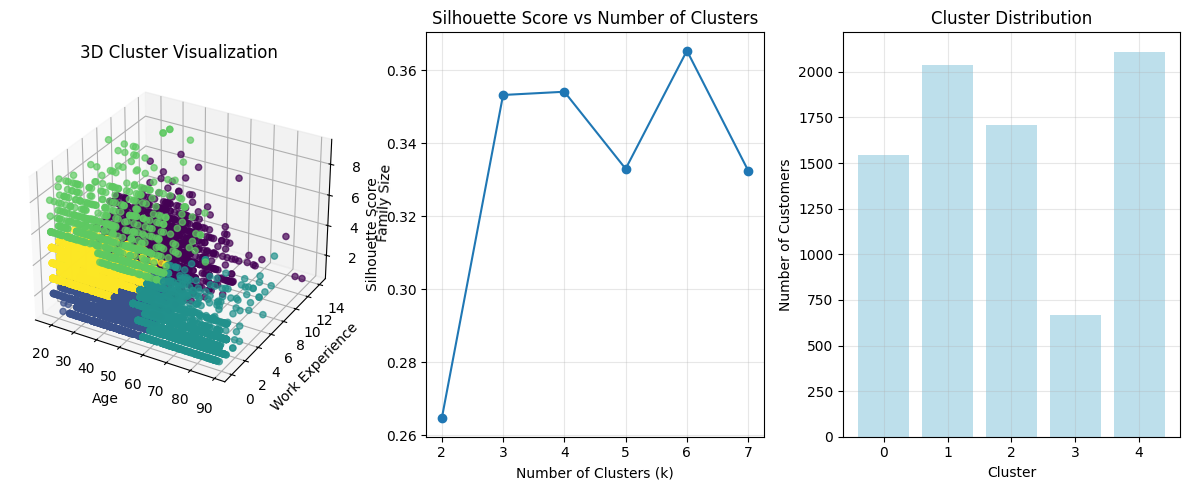

Silhouette Score for K=5: 0.333
Used features for clustering: ['Age', 'Work_Experience', 'Family_Size']


In [46]:
# Visualizing clusters using all three features and calculate silhouette score
plt.figure(figsize=(12, 5))

# 3D Visualization of all three features
from mpl_toolkits.mplot3d import Axes3D
ax = plt.subplot(1, 3, 1, projection='3d')
scatter = ax.scatter(df_clustered['Age'], df_clustered['Work_Experience'], df_clustered['Family_Size'],
                    c=df_clustered['Cluster'], cmap='viridis', alpha=0.7)
ax.set_xlabel('Age')
ax.set_ylabel('Work Experience')
ax.set_zlabel('Family Size')
ax.set_title('3D Cluster Visualization')

# Silhouette Score Analysis
plt.subplot(1, 3, 2)
k_range = range(2, 8)
silhouette_scores = []
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    labels_temp = kmeans_temp.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels_temp)
    silhouette_scores.append(score)

plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True, alpha=0.3)

# Cluster Distribution
plt.subplot(1, 3, 3)
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values, color='lightblue', alpha=0.8)
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Cluster Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print analysis results
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score for K=5: {silhouette_avg:.3f}")
print(f"Used features for clustering: {clustering_features}")

### Task 3: Hierarchical Clustering and Method Comparison

**Implementation Approach:**
I implemented hierarchical clustering using Ward linkage method and created detailed dendrograms to visualize the clustering hierarchy. I compared the performance of k-means and hierarchical clustering using silhouette scores and analyzed the characteristics of each cluster. This comparative approach allowed me to evaluate different clustering methodologies and understand their respective strengths in customer segmentation.

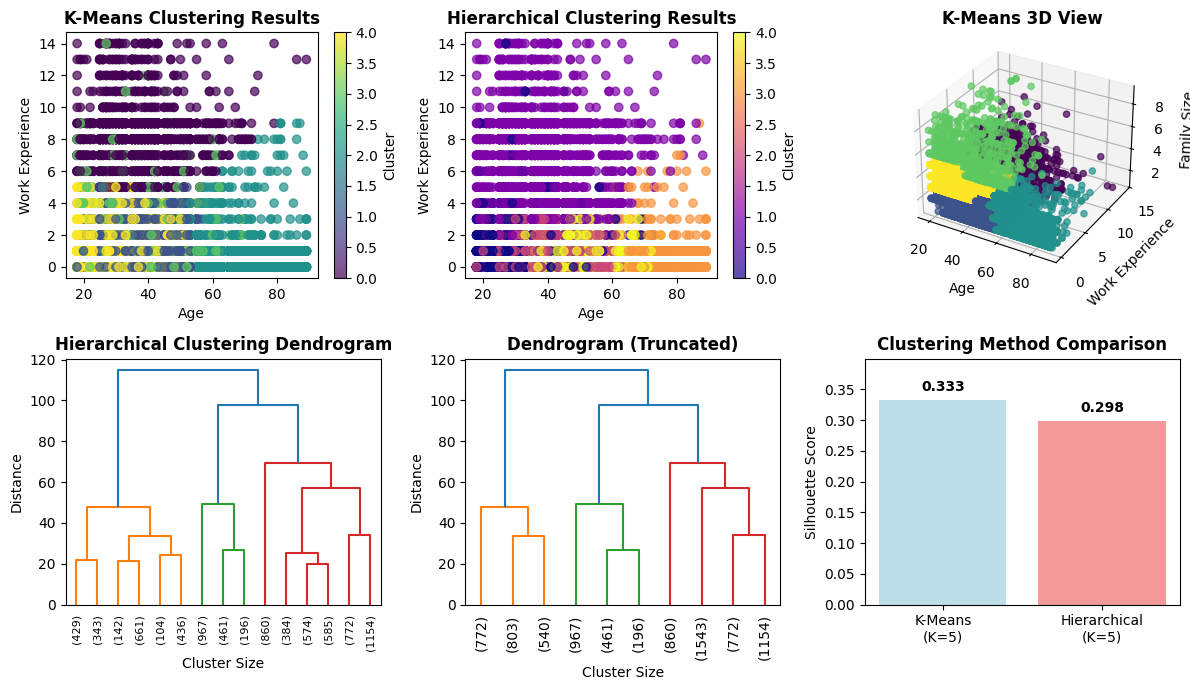

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Hierarchical clustering using Ward linkage
linkage_matrix = linkage(scaled_data, method='ward')

# Create detailed visualizations
plt.figure(figsize=(12,7))

# Comparison with hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(scaled_data)

# Plot 1: K-means clustering results
plt.subplot(2, 3, 1)
scatter = plt.scatter(df_clustered['Age'], df_clustered['Work_Experience'], 
                     c=df_clustered['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.title('K-Means Clustering Results', fontsize=12, fontweight='bold')
plt.colorbar(scatter, label='Cluster')

# Plot 2: Hierarchical clustering results
plt.subplot(2, 3, 2)
scatter = plt.scatter(df_clustered['Age'], df_clustered['Work_Experience'], 
                     c=hierarchical_labels, cmap='plasma', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.title('Hierarchical Clustering Results', fontsize=12, fontweight='bold')
plt.colorbar(scatter, label='Cluster')

# Plot 3: 3D comparison K-means
from mpl_toolkits.mplot3d import Axes3D
ax1 = plt.subplot(2, 3, 3, projection='3d')
scatter = ax1.scatter(df_clustered['Age'], df_clustered['Work_Experience'], df_clustered['Family_Size'],
                     c=df_clustered['Cluster'], cmap='viridis', alpha=0.7)
ax1.set_xlabel('Age')
ax1.set_ylabel('Work Experience')
ax1.set_zlabel('Family Size')
ax1.set_title('K-Means 3D View', fontsize=12, fontweight='bold')

# Plot 4: Full dendrogram
plt.subplot(2, 3, 4)
dendrogram(linkage_matrix, truncate_mode='lastp', p=15, 
           leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram', fontsize=12, fontweight='bold')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

# Plot 5: Truncated dendrogram for clarity
plt.subplot(2, 3, 5)
dendrogram(linkage_matrix, truncate_mode='lastp', p=10,
           leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram (Truncated)', fontsize=12, fontweight='bold')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

# Plot 6: Method comparison metrics
plt.subplot(2, 3, 6)
k_means_silhouette = silhouette_score(scaled_data, cluster_labels)
hierarchical_silhouette = silhouette_score(scaled_data, hierarchical_labels)

methods = ['K-Means\n(K=5)', 'Hierarchical\n(K=5)']
scores = [k_means_silhouette, hierarchical_silhouette]
colors = ['lightblue', 'lightcoral']

bars = plt.bar(methods, scores, color=colors, alpha=0.8)
plt.ylabel('Silhouette Score')
plt.title('Clustering Method Comparison', fontsize=12, fontweight='bold')
plt.ylim(0, max(scores) * 1.2)

# Add value labels on bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()
